# Project Introduction

Type 1 diabetes mellitus management represents a significant global healthcare challenge, affecting approximately 9.5% of the population globally (Mobasseri, 2020) and 0.4% in the United States (Fang, 2024). This condition requires precise insulin supplementation, and while advances in technology such as insulin pumps and continuous glucose monitoring (CGM) systems have markedly improved glycemic control, predicting and preventing dangerous glucose fluctuations remains a critical area for improvement.

Our project aims to develop an advanced predictive system that leverages state-of-the-art machine learning models to enhance glycemic control for individuals managing type 1 diabetes. The system will incorporate two major components:

1. **Personalized Blood Glucose Prediction System**: Using custom neural networks that leverage LSTM/GRU architectures with multi-head attention, this component will forecast glucose levels across multiple time horizons. We will explore CGM readings, insulin doses, and patient demographic information to understand which peramtiers will yeld the best results for our model. Our system will includ safety features for hypoglycemia risk assessment and maximum dose constraints, evaluated using clinical metrics such as Clarke Error Grid Analysis and Time in Range calculations.

2. **Glycemic Load Prediction from Meal Images**: This component aims to automate the assessment of the nutritional content of meals using the Nutrition 5k dataset from Google (Thames, 2021). By analyzing meal photographs, the system will provide post-meal glucose response predictions, guiding portion control and food selection for individuals managing diabetes.

The primary beneficiaries of this system are individuals with type 1 diabetes who use insulin pumps integrated with CGM systems. Additionally, individuals with brittle or refractory type 2 diabetes mellitus could also benefit from this solution. The ultimate goal is to improve the long-term health outcomes and lifestyle control for people living with diabetes by enhancing glucose trend forecasting and meal assessment tools.

# Introduction to This Notebook EDA 2.1

In this notebook, we will conduct a comprehensive Exploratory Data Analysis on the Hybrid Closed Loop (HCL) data obtained from the Tidepool-JDRF project. The primary goal of this analysis is to explore and understand the dataset's structure, completeness, and the relationships between various features. Specifically, we are interested in understanding factors that influence blood glucose levels in patients with type 1 diabetes mellitus who use continuous glucose monitoring (CGM) systems combined with insulin pumps.

The broader objective of our project is to develop a predictive system capable of forecasting clinically significant glucose level swings in people living with type 1 diabetes. This predictive system will utilize two major components: (1) a personalized blood glucose prediction system leveraging time-sequenced data using LSTM/GRU neural network models, and (2) a glycemic load prediction model using meal images via a CNN-based computer vision approach. Ultimately, this system aims to improve glycemic control and reduce the risk of hypoglycemia and hyperglycemia for individuals managing type 1 diabetes.

### Purpose of This Notebook

In this notebook, we focus specifically on EDA, which will serve as the foundation for subsequent model development. The primary tasks in this notebook are as follows:

1. **Data Understanding**: Load and explore the dataset to understand its structure, including the various types of measurements and features it contains.
2. **Data Quality and Completeness Analysis**: Identify any missing data, understand the coverage of time-series records, and investigate inconsistencies in the dataset.
3. **Feature Exploration**: Understand the distribution of features, identify patterns, and look for any potential correlations that may be of interest when predicting glucose swings.
4. **Temporal Analysis**: Evaluate the temporal nature of the data, focusing on trends, seasonality, and outliers in blood glucose measurements and related variables.
5. **Identify Key Features**: By the end of this notebook, we aim to determine which features are likely to be significant for predicting glucose level fluctuations.

The dataset we are using comprises longitudinal diabetes datasets split into different categories, including hybrid closed loop (HCL) data, physical activity-labeled datasets (PA), and sensor-augmented pump (SAP) datasets. In this notebook, we will start with the HCL data, focusing on understanding the data quality, structure, and identifying useful features.

Our EDA process will help us derive meaningful insights that will guide the development of our predictive model.

fIRST We'll start by loading the necessary data files and inspecting their structure.


# Loading the Data

To start our EDA process, we will first load the necessary data files. The dataset consists of various longitudinal records, which include CGM readings, insulin delivery information, and other relevant features.

We have the following data files to load:
- **Data Dictionary**: Provides information on each field in the dataset, including its type and purpose.
- **Metadata Summary**: Contains information about the files themselves, including collection periods, patient demographics, and data completeness.
- **Individual Patient Files**: These files contain the actual time-series data for glucose monitoring, insulin delivery, physical activity, and other events.

Let's start by importing the necessary libraries and loading the data into dataframes.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Load data dictionary and metadata summary
data_dictionary_path = "/content/HCL150-data-dictionary.csv"
metadata_summary_path = "/content/HCL150-train-metadata-summary.csv"

# Read the data dictionary and metadata summary into dataframes
data_dictionary_df = pd.read_csv(data_dictionary_path)
metadata_summary_df = pd.read_csv(metadata_summary_path)

# Unzip the train and test data files
train_zip_path = "/content/train-data-HCL.zip"
test_zip_path = "/content/test-data-HLC.zip"

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/train_data_HCL")

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/test_data_HCL")


In [2]:
# List the files in the train and test directories to verify extraction
print("\nTrain Data Files:")
train_files = os.listdir("/content/train_data_HCL/train-data")  # Corrected path
print(train_files)
print(f"Number of files in train_data: {len(train_files)}")

print("\nTest Data Files:")
test_files = os.listdir("/content/test_data_HCL/test-data")  # Corrected path
print(test_files)
print(f"Number of files in test_data: {len(test_files)}")


Train Data Files:
['train_db24ba0dee0434c704265a2fe8e2d2477e82754bc1b0474b4b565bae8938e0ad.csv', 'train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3eefe28b39fcb1e99ff6ff3775.csv', 'train_df4b9abf8afad76ffa8a5d9f8b1527195c6da92815b99b2f94afc4c54aba0a93.csv', 'train_e91b852b10e921afecf6d27de3ed8368922678cf91dbcdf9a52fb343d4f455ab.csv', 'train_62cf33f0c18803b3e42aea2b9405b3460bd091840a4685f2e90560ea61ec26ca.csv', 'train_d4bde730d6c4f387fc1a8c1bd9bf0476df16d5cf316393c9f5bcf9176b27dc70.csv', 'train_9fb0017766ded7fc4a2c3ee8f8065eda298b23e1f2557b570c3c50585447bb53.csv', 'train_ad5e634276063cc617a900e7f90fbbbe7d16aaf5b6c11dccf9d8de94c2bcb217.csv', 'train_a4b06f395c2bcc874955057c9027b10ce70cc88dee2e039f793c29f2da3b3e79.csv', 'train_c7a9dad87e38f1cdc5dc1082cf67eaae9c37960dc2102802e8204e6af0da0d2d.csv', 'train_dee1fe0420641994d9af91cf2a59aeeed7f6de7a18d09f557a431a8302949418.csv', 'train_8fa07b5649dfb94cd6e3ca71d35d223349b25a56c6310b4e7ad3e0d1d0c781a2.csv', 'train_62a6dc5642ee5ee6a09362e77ef3a4558db16

In [3]:
# Display the first few rows of each file to understand their structure
print("Data Dictionary:")
display(data_dictionary_df.head())

print("\nMetadata Summary:")
metadata_summary_path = "/content/HCL150-train-metadata-summary.csv"
metadata_summary_df = pd.read_csv(metadata_summary_path)
display(metadata_summary_df.head())

Data Dictionary:


,FIELD,DESCRIPTION,TYPE,EXAMPLES
0,activeSchedule,The active schedule id set associated with pum...,STRING,a553a79b
1,activityDuration.units,The duration of a physical activity,STRING,"minutes, seconds"
2,activityDuration.value,The units of the duration of a physical activity,FLOAT,"60, 4412.55045473575"
3,activityName,The name of the physical activity event if ava...,STRING,"Running, Walking, Cycling, Yoga"
4,alarmType,The type of alarm activated,STRING,"no_insulin, low_insulin, occlusion"



Metadata Summary:


,file_name,firstDate,lastDate,cgmPumpDayStart,cgmPumpDayEnd,cgmPumpDaySpan,cgmPumpDaysWithData,cgmPumpPctSpanWithData,ageStart,yearsLivingWithDiabetesStart,diagnosisType,biologicalSex
0,train_d02886c5e75bef38dee6ecc3d5595b8e8f31651c...,6/28/19,10/13/19,6/29/19,10/13/19,107,107,1.0,10,8,type1,female
1,train_6b1b0faa65283ab72bc54a1a1f2f1169743b9faa...,1/31/19,9/18/19,1/31/19,9/18/19,231,231,1.0,31,7,type1,female
2,train_8fa07b5649dfb94cd6e3ca71d35d223349b25a56...,5/24/19,10/12/19,5/29/19,10/12/19,137,137,1.0,10,1,type1,female
3,train_c6c5c87bfc5aa0402d81eedd07b9da19e68fdf63...,5/8/19,10/13/19,6/29/19,10/13/19,107,107,1.0,12,9,type1,NaN
4,train_ce8e92832ff289e5f816c9ea27d5377e7c7c253a...,2/19/17,10/13/19,11/10/18,10/13/19,338,338,1.0,34,28,type1,female


In the next step, we will explore the metadata file to understand the structure and coverage of the data and to identify key characteristics and assess data completeness.

## Metadata Analysis
Now that we have loaded the metadata summary and data dictionary, we can gain insights into the overall structure of the dataset.

We can see that the metadata provides details such as:

**File Information:** file_name, firstDate, lastDate, cgmPumpDayStart, cgmPumpDayEnd.
**Data Coverage:** Fields like cgmPumpDaySpan, cgmPumpDaysWithData, cgmPumpPctSpanWithData provide details on the coverage of glucose data over the time span.

**Patient Characteristics**: Fields such as ageStart, ageEnd, yearsLivingWithDiabetesStart, diagnosisType, and biologicalSex give us an overview of patient demographics.


**Let's start by summarizing key statistics and visualizing some of these fields.**


1.   We'll look at the data coverage for each file to ensure that we have a complete set of time-series information.

2. We'll also analyze patient demographics to understand the distribution of ages, gender, and years living with diabetes.

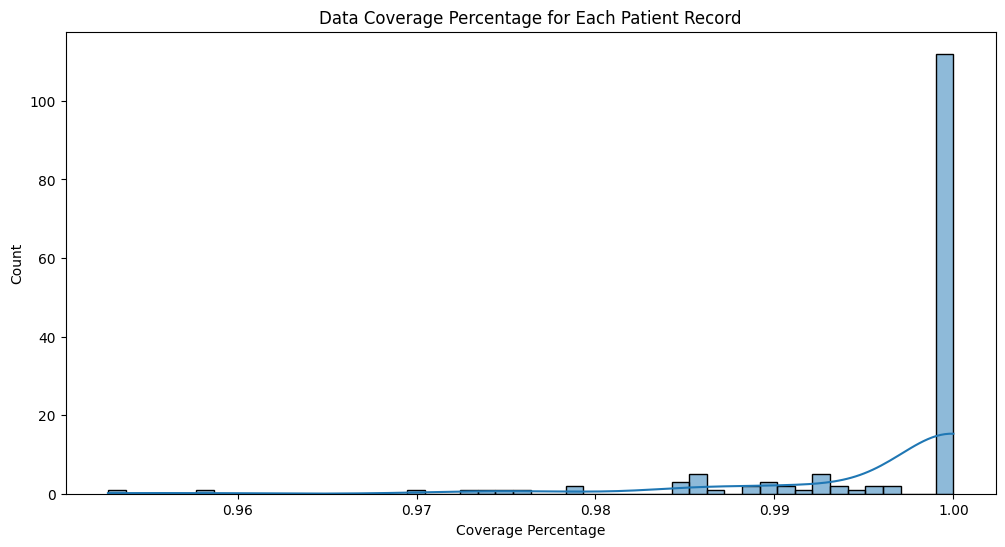

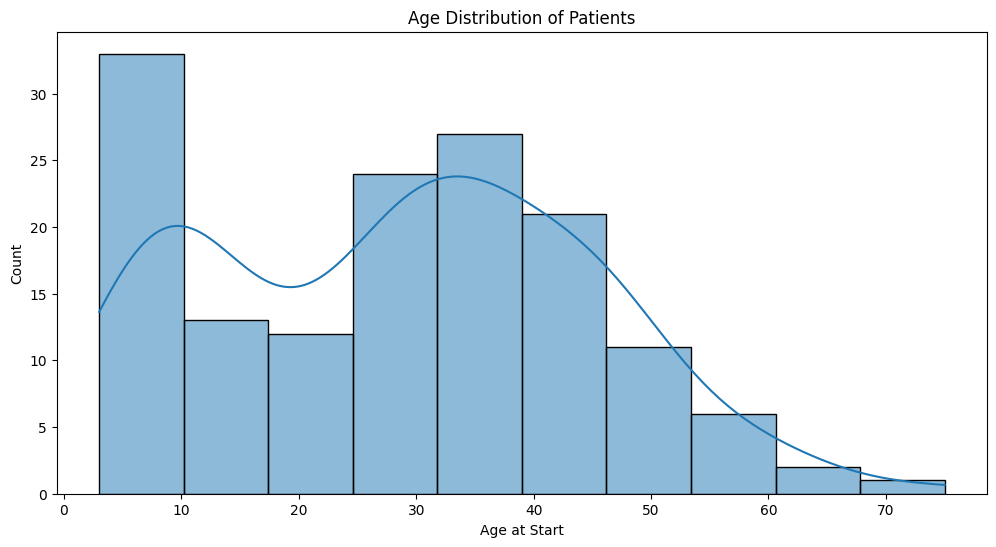

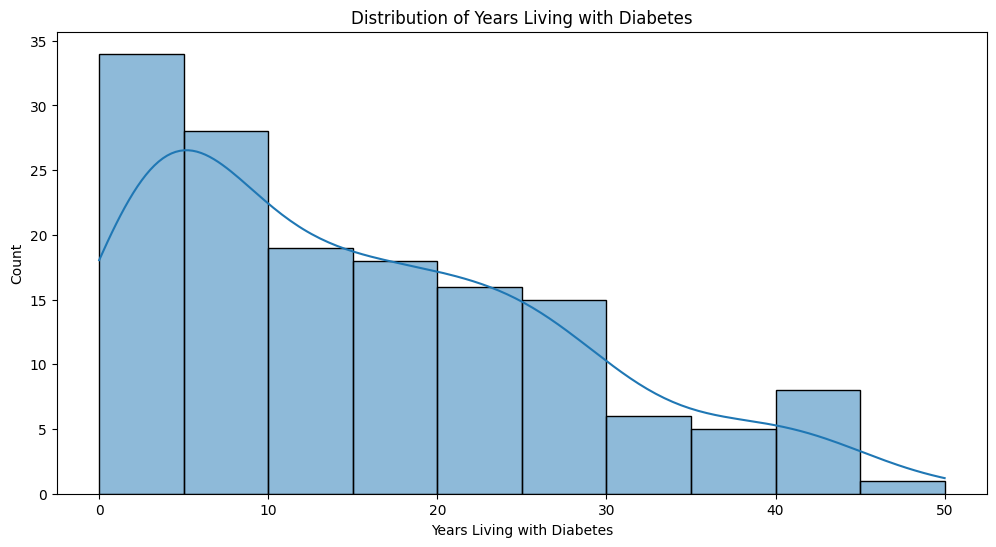

Missing Values in Patient Characteristics:
biologicalSex                   37
ageStart                         0
yearsLivingWithDiabetesStart     0
dtype: int64


In [17]:
# Summarize metadata statistics
metadata_summary = metadata_summary_df.describe()

# Visualize data coverage
plt.figure(figsize=(12, 6))
sns.histplot(metadata_summary_df['cgmPumpPctSpanWithData'], kde=True)
plt.title('Data Coverage Percentage for Each Patient Record')
plt.xlabel('Coverage Percentage')
plt.ylabel('Count')
plt.show()

# Visualize age distribution
plt.figure(figsize=(12, 6))
sns.histplot(metadata_summary_df['ageStart'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age at Start')
plt.ylabel('Count')
plt.show()

# Visualize years living with diabetes
plt.figure(figsize=(12, 6))
sns.histplot(metadata_summary_df['yearsLivingWithDiabetesStart'], bins=10, kde=True)
plt.title('Distribution of Years Living with Diabetes')
plt.xlabel('Years Living with Diabetes')
plt.ylabel('Count')
plt.show()

# Check for missing values in patient characteristics
missing_values = metadata_summary_df[['biologicalSex', 'ageStart', 'yearsLivingWithDiabetesStart']].isnull().sum()
print("Missing Values in Patient Characteristics:")
print(missing_values)


### Metadata Analysis

Based on the graphs and data above we can make the follwoing evaluations

#### 1. Data Coverage Percentage
- **Observation**: The histogram of `cgmPumpPctSpanWithData` shows that most patient records have 100% data coverage. This means that nearly all patients have complete data for the collection period, which is a significant advantage when developing time-series models.
- **Take away for project**: The high coverage percentage suggests minimal need for imputation or dealing with missing time-series data, ensuring the robustness of the temporal analysis.

#### 2. Age Distribution of Patients
- **Observation**: The histogram shows a wide age range for patients, with peaks at younger ages (0-10) and some clustering around ages 30-40. There are also fewer patients above the age of 50.
- **Take away for project**: The dataset has a diverse range of ages, which is helpful in developing a more generalized prediction model. However, we should be mindful that the distribution is skewed towards younger individuals, which may lead to reduced predictive performance for older populations (We'll have to test and account for this during model developemnt).

#### 3. Distribution of Years Living with Diabetes
- **Observation**: The majority of patients have been living with diabetes for a relatively short period (0-10 years). There is a decreasing number of records for individuals who have lived with diabetes for longer durations.
- **Take away for project**: Since a large portion of the dataset is made up of recently diagnosed individuals, our model may be biased towards patients in the earlier stages of diabetes management. We should consider stratifying the data by `yearsLivingWithDiabetes` to ensure all groups are well represented during model training.

#### 4. Missing Values in Patient Characteristics
- **Observation**: There are 37 missing values in the `biologicalSex` column, while `ageStart` and `yearsLivingWithDiabetesStart` have complete data.
- **Take away for project**: The missing `biologicalSex` values may impact our ability to assess gender-based differences in glucose regulation. Iimputeding this data based on the information we have would be challengeing and probably not recommended we could ignore it if it does not significantly influence our target variable or alternativly since its a low number of patents 37 out of 151, we could simply just drop those records as well.

### Next Steps
- We'll analyzing feature-level completeness and variability in the patient data files. This will help us understand the quality and distribution of the input variables critical for glucose prediction.
- Given the distribution characteristics and missing values, we should also plan to test the impact of gender and age stratification on model performance.



As we've seen above we have 150 seprate indivisual patients files, so to address effiecnet ways of analysing this we'll Concatenate and Create a 'Unified Dataset'.

But first lets explore a subset of data to examine their structure. We  load a 5 files to understand the data layout and ensure that they are consistent across all records.



### Let us Begin with Batch Loading and Structure Analysis
We will start by loading a small subset of the files to get an idea of their structure. This initial exploration will help us decide on the next steps for full-scale merging and analysis.

In [4]:
import pandas as pd
import os

# Define the path to the patient records folder
patient_data_path = "/content/train_data_HCL/train-data"

# List all files in the directory
all_files = os.listdir(patient_data_path)

# Load a sample of 5 files to understand their structure
sample_files = all_files[:5]
sample_dataframes = []

# Iterate over the sample files and load them into dataframes
for file_name in sample_files:
    file_path = os.path.join(patient_data_path, file_name)
    try:
        df = pd.read_csv(file_path)
        df['file_name'] = file_name  # Add a column to track file origin
        sample_dataframes.append(df)
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

# Display the first few rows of each sample dataframe to understand their structure
for i, df in enumerate(sample_dataframes):
    print(f"\nData from file: {sample_files[i]}")
    display(df.head(), df.columns.tolist()  )


<ipython-input-4-6100ecc9ca23>:18: DtypeWarning: Columns (0,2,4,5,6,8,9,12,28,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Data from file: train_db24ba0dee0434c704265a2fe8e2d2477e82754bc1b0474b4b565bae8938e0ad.csv


,deliveryType,duration,est.annotations,est.gapSize,est.localTime,est.timeProcessing,est.timezoneOffset,est.type,est.version,id,...,nutrition.carbohydrate.units,rate,subType,time,timezoneOffset,type,units,uploadId,value,file_name
0,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,52d1faf8d4d1296218b7bbcbf200be901438f52,...,NaN,NaN,timeChange,2019-05-13T04:01:30.798Z,NaN,deviceEvent,NaN,c62c7888a22d38a195d34246f653c542,NaN,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
1,temp,14400000.0,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,d506fcf4eb149a0f3087fdfc44d0c7be1438f52,...,NaN,0.55,NaN,2019-06-24T00:00:00.000Z,NaN,basal,NaN,c62c7888a22d38a195d34246f653c542,NaN,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
2,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,67d88cb0a80606f8d4bf25ff9408e69c1438f52,...,NaN,NaN,NaN,2019-06-24T00:00:25.000Z,NaN,cbg,mmol/L,c62c7888a22d38a195d34246f653c542,7.16046,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
3,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,d844b7f6c8c991706e26321d84121a9d1438f52,...,NaN,NaN,NaN,2019-06-24T00:05:25.000Z,NaN,cbg,mmol/L,c62c7888a22d38a195d34246f653c542,6.77191,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
4,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,50280883b91c19c8d477907098afb31f1438f52,...,NaN,NaN,NaN,2019-06-24T00:10:25.000Z,NaN,cbg,mmol/L,c62c7888a22d38a195d34246f653c542,6.38336,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...


['deliveryType',
 'duration',
 'est.annotations',
 'est.gapSize',
 'est.localTime',
 'est.timeProcessing',
 'est.timezoneOffset',
 'est.type',
 'est.version',
 'id',
 'normal',
 'nutrition.carbohydrate.net',
 'nutrition.carbohydrate.units',
 'rate',
 'subType',
 'time',
 'timezoneOffset',
 'type',
 'units',
 'uploadId',
 'value',
 'file_name']


Data from file: train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3eefe28b39fcb1e99ff6ff3775.csv


,activityDuration.units,activityDuration.value,activityName,deliveryType,deviceId,deviceManufacturers,deviceModel,deviceSerialNumber,deviceTags,distance.units,...,subType,time,timeProcessing,timezoneOffset,type,units,uploadId,value,version,file_name
0,NaN,NaN,NaN,NaN,c6b6b56d,5c900476,c22270de,NaN,['cgm'],NaN,...,NaN,2018-11-16T05:32:34.000Z,none,-480.0,upload,NaN,upid_982436701463de614e337d36f1926b2f,NaN,org.tidepool.blipnotes:2.0.3-501,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...
1,NaN,NaN,NaN,NaN,c6b6b56d,5c900476,c22270de,NaN,['cgm'],NaN,...,NaN,2018-11-16T05:42:33.000Z,none,-480.0,upload,NaN,upid_72b70e539436aef692e1c52e725f8db3,NaN,org.tidepool.blipnotes:2.0.3-501,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...
2,NaN,NaN,NaN,NaN,c6b6b56d,5c900476,c22270de,NaN,['cgm'],NaN,...,NaN,2018-11-16T05:52:33.000Z,none,-480.0,upload,NaN,upid_74aa9cb828d7e733fb61f0d47379d548,NaN,org.tidepool.blipnotes:2.0.3-501,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...
3,NaN,NaN,NaN,NaN,c6b6b56d,5c900476,c22270de,NaN,['cgm'],NaN,...,NaN,2018-11-16T06:07:33.000Z,none,-480.0,upload,NaN,upid_c6e8e8d1f24901bf0c03d669f480185e,NaN,org.tidepool.blipnotes:2.0.3-501,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...
4,NaN,NaN,NaN,NaN,c6b6b56d,5c900476,c22270de,NaN,['cgm'],NaN,...,NaN,2018-11-16T06:22:33.000Z,none,-480.0,upload,NaN,upid_a040bd042240085327f61809c1745b97,NaN,org.tidepool.blipnotes:2.0.3-501,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...


['activityDuration.units',
 'activityDuration.value',
 'activityName',
 'deliveryType',
 'deviceId',
 'deviceManufacturers',
 'deviceModel',
 'deviceSerialNumber',
 'deviceTags',
 'distance.units',
 'distance.value',
 'duration',
 'energy.units',
 'energy.value',
 'est.annotations',
 'est.gapSize',
 'est.localTime',
 'est.timeProcessing',
 'est.timezoneOffset',
 'est.type',
 'est.version',
 'id',
 'normal',
 'nutrition.carbohydrate.net',
 'nutrition.carbohydrate.units',
 'rate',
 'subType',
 'time',
 'timeProcessing',
 'timezoneOffset',
 'type',
 'units',
 'uploadId',
 'value',
 'version',
 'file_name']


Data from file: train_df4b9abf8afad76ffa8a5d9f8b1527195c6da92815b99b2f94afc4c54aba0a93.csv


,activityName,deliveryType,duration,est.annotations,est.gapSize,est.localTime,est.timeProcessing,est.timezoneOffset,est.type,est.version,...,nutrition.carbohydrate.units,rate,subType,time,timezoneOffset,type,units,uploadId,value,file_name
0,NaN,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,...,NaN,NaN,NaN,2018-10-20T00:02:45.000Z,NaN,cbg,mmol/L,2274675794d4897662658afa620a5adf,9.71381,train_df4b9abf8afad76ffa8a5d9f8b1527195c6da928...
1,NaN,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,...,NaN,NaN,NaN,2018-10-20T00:07:45.000Z,NaN,cbg,mmol/L,2274675794d4897662658afa620a5adf,9.49178,train_df4b9abf8afad76ffa8a5d9f8b1527195c6da928...
2,NaN,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,...,NaN,NaN,NaN,2018-10-20T00:12:45.000Z,NaN,cbg,mmol/L,2274675794d4897662658afa620a5adf,9.10323,train_df4b9abf8afad76ffa8a5d9f8b1527195c6da928...
3,NaN,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,...,NaN,NaN,NaN,2018-10-20T00:17:45.000Z,NaN,cbg,mmol/L,2274675794d4897662658afa620a5adf,9.15873,train_df4b9abf8afad76ffa8a5d9f8b1527195c6da928...
4,NaN,NaN,NaN,unable-to-impute-tzo,NaN,NaT,NaN,NaN,UNCERTAIN,0.0.4,...,NaN,NaN,NaN,2018-10-20T00:22:45.000Z,NaN,cbg,mmol/L,2274675794d4897662658afa620a5adf,8.99221,train_df4b9abf8afad76ffa8a5d9f8b1527195c6da928...


['activityName',
 'deliveryType',
 'duration',
 'est.annotations',
 'est.gapSize',
 'est.localTime',
 'est.timeProcessing',
 'est.timezoneOffset',
 'est.type',
 'est.version',
 'id',
 'normal',
 'nutrition.carbohydrate.net',
 'nutrition.carbohydrate.units',
 'rate',
 'subType',
 'time',
 'timezoneOffset',
 'type',
 'units',
 'uploadId',
 'value',
 'file_name']


Data from file: train_e91b852b10e921afecf6d27de3ed8368922678cf91dbcdf9a52fb343d4f455ab.csv


,activityDuration.units,activityDuration.value,activityName,deliveryType,distance.units,distance.value,duration,energy.units,energy.value,est.annotations,...,nutrition.carbohydrate.units,rate,subType,time,timezoneOffset,type,units,uploadId,value,file_name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2018-11-11T00:02:46.000Z,NaN,cbg,mmol/L,73db8670572fbfda70dd36bc7a824ff6,5.38423,train_e91b852b10e921afecf6d27de3ed8368922678cf...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2018-11-11T00:07:46.000Z,NaN,cbg,mmol/L,73db8670572fbfda70dd36bc7a824ff6,5.43973,train_e91b852b10e921afecf6d27de3ed8368922678cf...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2018-11-11T00:12:45.000Z,NaN,cbg,mmol/L,73db8670572fbfda70dd36bc7a824ff6,5.43973,train_e91b852b10e921afecf6d27de3ed8368922678cf...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2018-11-11T00:17:46.000Z,NaN,cbg,mmol/L,73db8670572fbfda70dd36bc7a824ff6,5.38423,train_e91b852b10e921afecf6d27de3ed8368922678cf...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2018-11-11T00:22:46.000Z,NaN,cbg,mmol/L,73db8670572fbfda70dd36bc7a824ff6,5.27321,train_e91b852b10e921afecf6d27de3ed8368922678cf...


['activityDuration.units',
 'activityDuration.value',
 'activityName',
 'deliveryType',
 'distance.units',
 'distance.value',
 'duration',
 'energy.units',
 'energy.value',
 'est.annotations',
 'est.gapSize',
 'est.localTime',
 'est.timeProcessing',
 'est.timezoneOffset',
 'est.type',
 'est.version',
 'id',
 'normal',
 'nutrition.carbohydrate.net',
 'nutrition.carbohydrate.units',
 'rate',
 'subType',
 'time',
 'timezoneOffset',
 'type',
 'units',
 'uploadId',
 'value',
 'file_name']


Data from file: train_62cf33f0c18803b3e42aea2b9405b3460bd091840a4685f2e90560ea61ec26ca.csv


,activityDuration.units,activityDuration.value,activityName,deliveryType,distance.units,distance.value,duration,energy.units,energy.value,est.annotations,...,nutrition.carbohydrate.units,rate,subType,time,timezoneOffset,type,units,uploadId,value,file_name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2019-06-28T00:03:36.000Z,NaN,cbg,mmol/L,d792816bea96a18865a76c46f821caf6,10.04685,train_62cf33f0c18803b3e42aea2b9405b3460bd09184...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2019-06-28T00:08:36.000Z,NaN,cbg,mmol/L,d792816bea96a18865a76c46f821caf6,9.99135,train_62cf33f0c18803b3e42aea2b9405b3460bd09184...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2019-06-28T00:13:35.000Z,NaN,cbg,mmol/L,d792816bea96a18865a76c46f821caf6,9.93584,train_62cf33f0c18803b3e42aea2b9405b3460bd09184...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2019-06-28T00:18:35.000Z,NaN,cbg,mmol/L,d792816bea96a18865a76c46f821caf6,9.76932,train_62cf33f0c18803b3e42aea2b9405b3460bd09184...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,...,NaN,NaN,NaN,2019-06-28T00:23:35.000Z,NaN,cbg,mmol/L,d792816bea96a18865a76c46f821caf6,9.71381,train_62cf33f0c18803b3e42aea2b9405b3460bd09184...


['activityDuration.units',
 'activityDuration.value',
 'activityName',
 'deliveryType',
 'distance.units',
 'distance.value',
 'duration',
 'energy.units',
 'energy.value',
 'est.annotations',
 'est.gapSize',
 'est.localTime',
 'est.timeProcessing',
 'est.timezoneOffset',
 'est.type',
 'est.version',
 'id',
 'normal',
 'nutrition.carbohydrate.net',
 'nutrition.carbohydrate.units',
 'rate',
 'subType',
 'time',
 'timezoneOffset',
 'type',
 'units',
 'uploadId',
 'value',
 'file_name']

### key observations:

**Inconsistent Number of Columns Across Files:**

The number of columns in the sample files varies, ranging between 22 and 30 columns. This suggests that different patient records may contain different sets of features.
Common columns include fields like deliveryType, duration, time, type, units, etc., but not all files have the same structure.
Mixed Data Types and Warnings:


**Column Descriptions:**

Many columns have mixed data, such as Null values, time-change events, and some of the errors in the data as categorical information like "unable-to-impute-tzo".
We can also see that the data records different types of events, including:
CGM readings (cbg): Measurements of blood glucose levels.
Insulin Events (basal, bolus): Delivery of basal or bolus insulin doses.
Nutrition Events (nutrition.carbohydrate.net): Carbohydrate intake information.
Device Events (deviceEvent): Logging changes related to the device, such as timeChange.
Handling Different Event Types:

There are multiple event types (e.g., cbg, basal, food, deviceEvent). We will need to differentiate these events and ensure consistency when merging records.
Certain events, such as deviceEvent or timeChange, may not directly contribute to predicting glucose levels and might be filtered or processed differently.

### Looking at data
 **Define a Common Schema:**
 We need to create a common schema for concatenation, selecting key columns that are consistent across most files. Missing columns will need to be filled with NaN.

**Standardize Data Types**: We'll also Convert all columns to uniform data types where possible (e.g., float for numerical fields, string for categorical data).



#### Updated Columns for Analysis

Here are columns we'll explore that seem to be common accross the patients

- **`activityName`**: The name of the physical activity event (e.g., Running, Walking). Important for understanding exercise impact.
- **`deliveryType`**: The type of insulin delivery (e.g., basal, bolus). Critical for understanding treatment effects.
- **`deviceId`, `deviceManufacturers`, `deviceModel`, `deviceSerialNumber`**: Device identifiers to track data source differences.
- **`duration`**: Duration of an event (e.g., basal insulin delivery), which is important for understanding treatment duration.
- **`est.annotations`, `est.gapSize`, `est.type`**: Estimated annotations and event type, especially useful in cases of gaps or specific labeled events.
- **`nutrition.carbohydrate.net`, `nutrition.carbohydrate.units`**: Nutritional information (carbohydrate intake) is critical for modeling glucose response.
- **`rate`**: Rate of insulin delivery or basal rate; important for dosage analysis.
- **`time`, `timeProcessing`**: Time stamps for each event. Used to understand the temporal sequence of events.
- **`type`**: Event type (e.g., `cbg`, `basal`, `food`). Helps in differentiating CGM readings from insulin or food events.
- **`value`**: The measured value of the event (e.g., glucose level for `cbg`). Essential for the prediction task.
- **`file_name`**: Helps track the data origin, allowing us to identify patient-specific records.

#### Columns Removed
- **`deviceTags`**: Mostly contains additional tags, not essential for the analysis.
- **`activityDuration.units`, `activityDuration.value`, `distance.units`, `distance.value`, `energy.units`, `energy.value`**: These were present only in some files and had significant missing data.
- **`version`**: Software version; not relevant for our analysis of glucose levels.

We will proceed with this updated column list, ensuring we have enough coverage of important features while maintaining consistency across all files.


In [5]:

# Initialize an empty list to hold DataFrames
all_dataframes = []

# Define the updated common columns based on the observations
common_columns = [
    'activityName', 'deliveryType', 'deviceId', 'deviceManufacturers',
    'deviceModel', 'deviceSerialNumber', 'duration', 'est.annotations',
    'est.gapSize', 'est.type', 'nutrition.carbohydrate.net',
    'nutrition.carbohydrate.units', 'rate', 'time', 'timeProcessing',
    'type', 'value', 'file_name'
]

# Iterate over all files and load them into DataFrames
for file_name in all_files:
    file_path = os.path.join(patient_data_path, file_name)
    try:
        df = pd.read_csv(file_path, low_memory=False)
        df['file_name'] = file_name  # Track the origin of the data

        # Reindex to match common columns and add missing columns as NaN
        df = df.reindex(columns=common_columns)

        all_dataframes.append(df)
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

# Concatenate all DataFrames into a single DataFrame
full_data = pd.concat(all_dataframes, ignore_index=True)

# Display basic information about the unified DataFrame
print("Unified DataFrame Shape:", full_data.shape)
print("Unified DataFrame Sample:")
display(full_data.head())


Unified DataFrame Shape: (12123005, 18)
Unified DataFrame Sample:


,activityName,deliveryType,deviceId,deviceManufacturers,deviceModel,deviceSerialNumber,duration,est.annotations,est.gapSize,est.type,nutrition.carbohydrate.net,nutrition.carbohydrate.units,rate,time,timeProcessing,type,value,file_name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,NaN,UNCERTAIN,NaN,NaN,NaN,2019-05-13T04:01:30.798Z,NaN,deviceEvent,NaN,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
1,NaN,temp,NaN,NaN,NaN,NaN,14400000.0,unable-to-impute-tzo,NaN,UNCERTAIN,NaN,NaN,0.55,2019-06-24T00:00:00.000Z,NaN,basal,NaN,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,NaN,UNCERTAIN,NaN,NaN,NaN,2019-06-24T00:00:25.000Z,NaN,cbg,7.16046,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,NaN,UNCERTAIN,NaN,NaN,NaN,2019-06-24T00:05:25.000Z,NaN,cbg,6.77191,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unable-to-impute-tzo,NaN,UNCERTAIN,NaN,NaN,NaN,2019-06-24T00:10:25.000Z,NaN,cbg,6.38336,train_db24ba0dee0434c704265a2fe8e2d2477e82754b...


Now we have a combined data set with all the patinet's information, denoted by the addition of 'file_name' column to distiguathe records from individual patients

### Next lets evaluate the Combined Dataset

####  Overview of Missing Data
To start we need to assess the completeness of the data. This means seeing how much missing data we have in each of the features and determining an appropriate approach for data cleaning strategy.

Specifically, in this step, we will:
1. **Calculate Missing Values**: Compute the total number of missing values and the percentage of missing data for each column in the dataset.
2. **Visualize Missing Data**: Use visualizations such as heatmaps and bar charts to identify patterns of missing data across the dataset. This can help us understand if certain columns or groups of columns are more prone to missing data.



Missing Data Summary:


,Missing Values,Percentage Missing
activityName,12119129,99.968028
deliveryType,7574022,62.476440
deviceId,12105295,99.853914
deviceManufacturers,12111763,99.907267
deviceModel,12111767,99.907300
deviceSerialNumber,12122985,99.999835
duration,7572491,62.463812
est.annotations,126484,1.043339
est.gapSize,11969239,98.731618
est.type,233394,1.925216


<ipython-input-6-1837d63e042c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data_summary.index, y=missing_data_summary['Percentage Missing'], palette='viridis')


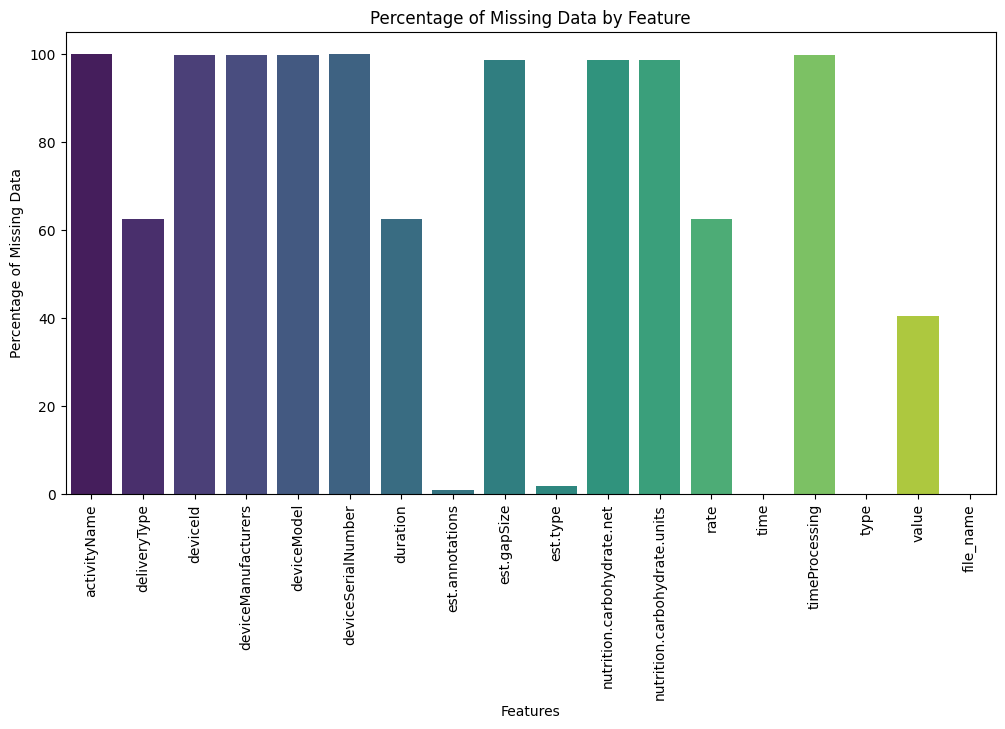

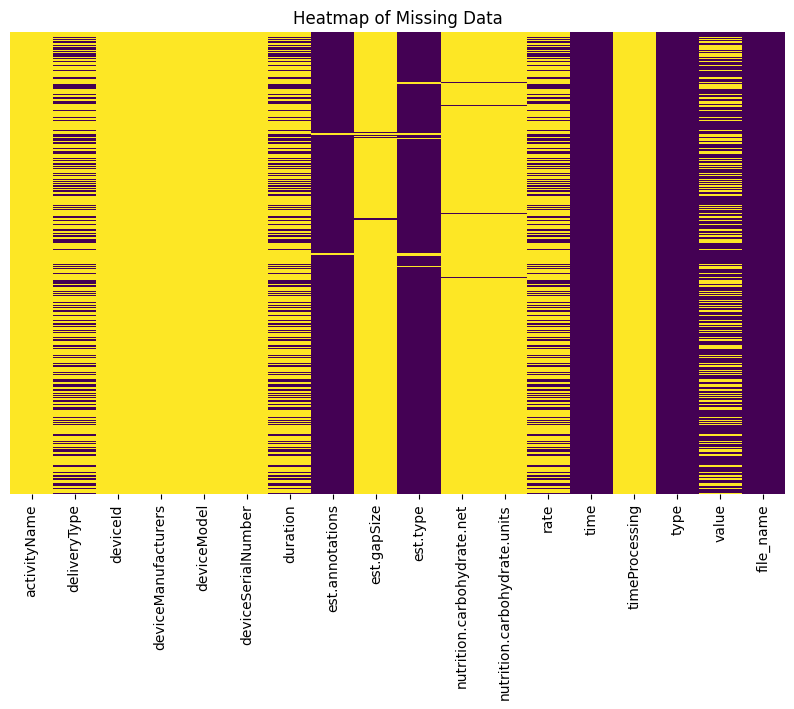

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values for each column
missing_values = full_data.isnull().sum()
missing_percentage = (missing_values / len(full_data)) * 100

# Create a DataFrame to summarize missing data
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Display the missing data summary
print("Missing Data Summary:")
display(missing_data_summary)

# Plotting missing data percentage for each column
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data_summary.index, y=missing_data_summary['Percentage Missing'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Data')
plt.title('Percentage of Missing Data by Feature')
plt.show()

# Visualizing missing data with a heatmap as well
plt.figure(figsize=(10, 6))
sns.heatmap(full_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.show()



#### Looking at our Missing Data
Based on the analysis results, we can see significant variations in the amount of missing data across different features. Below is a summary of the key observations:
- **Features with High Percentage of Missing Data (> 90%)**:
  - **`activityName` (99.97%)**: This column contains mostly missing values. Since this data is very sparse, we recommend **dropping this feature** from further analysis.
  - **`deviceId`, `deviceManufacturers`, `deviceModel`, `deviceSerialNumber` (all > 99.85%)**: These device-related fields contain over 99% missing data, making them less useful for the predictive model. We recommend **dropping these columns**.
  - **`timeProcessing` (99.91%)**: This feature has almost no data, suggesting it can also be safely **removed**.

- **Features with Moderate Percentage of Missing Data (30% - 70%)**:
  - **`deliveryType` (62.48%)**: Missing data in `deliveryType` indicates that it is not always recorded. This feature can be important for understanding insulin administration. Our options are **using domain-specific imputation**, such as imputing the most frequent type based on context (e.g., basal, bolus).
  - **`duration` (62.46%)**: This feature is can be used to understanding event lengths such as basal insulin delivery. For missing values, we could **imputing based on similar event types** or **time-based interpolation**.
  - **`rate` (62.48%)**: If we choose to calibrate for  insulin dosing this feature could be useful, then we can consider **using mean or mode imputation** for missing values depending on the type of event.

- **Features with Low Percentage of Missing Data (< 5%)**:
  - **`est.annotations` (1.04%)** and **`est.type` (1.93%)**: These columns have relatively low missingness. **Impute missing values** with either the most common label or apply specific rules based on related features.
  
- **Key Features with Complete Data**:
  - **`time` (0%)**: This timestamp column is fully populated and essential for time-series analysis.
  - **`type` (0%)**: The event type (e.g., `cbg`, `bolus`) is crucial for understanding the nature of each entry.
  - **`file_name` (0%)**: This feature is complete and helps track the source patient file.

- **Feature with Significant Missing Data (~ 40%)**:
  - **`value` (40.59%)**: The `value` field contains measurements such as glucose (`cbg`) levels, insulin doses, etc.
  
    This is a critical feature, we need to figure our exactly which values are missing since this field is a mix of differnt types. Then based on the distrabution we'll need a tailored approach for handling missing values. **Interpolation methods** or **carrying forward previous values** are some optiones we could use during cleaning for this type of time-series data.

- **Nutrition-Related Features**:
  - **`nutrition.carbohydrate.net`, `nutrition.carbohydrate.units` (~ 98.76%)**: These features are mostly empty. Given their sparse nature, while we may have derived some important atributes for our model the lack of data means that it wont be effective and there is no clear way to impud this informaiton based on the few records we have. We might have to drop them for now and look at how to aument the data in the future.



### Before we proceed with the data cleaning phase, we'll need to understand the extent of missing data in the `value` column.

 Since the `value` column is used to represent different types of readings—such as `cbg` (glucose levels), `bolus` (insulin doses), etc.—we need to break down the missing values based on the `type` column. This will help us better understand which types have significant missing data and guide us in designing an appropriate imputation strategy.


1. First, we will identify all unique values in the `type` column to understand the different categories of readings present in the dataset.
2. Then we will then calculate the number and percentage of missing values for each `type` in the `value` column.
3. Lastly, we will create a visualization that shows the missing value distribution across different types.



In [9]:
# Identify unique types in the 'type' column
unique_types = full_data['type'].unique()
print("Unique Types of Events:", unique_types)


Unique Types of Events: ['deviceEvent' 'basal' 'cbg' 'bolus' 'food' 'smbg' 'upload'
 'physicalActivity' 'pumpSettings' 'cgmSettings' 'bloodKetone']


In [10]:
# Calculate missing values for 'value' based on each 'type'
missing_values_by_type = full_data.groupby('type')['value'].apply(lambda x: x.isnull().sum())
total_values_by_type = full_data['type'].value_counts()
missing_percentage_by_type = (missing_values_by_type / total_values_by_type) * 100

# Create a DataFrame to summarize missing data for each type
missing_values_summary = pd.DataFrame({
    'Total Values': total_values_by_type,
    'Missing Values': missing_values_by_type,
    'Percentage Missing': missing_percentage_by_type
})


Missing Values Summary by Type:


,Total Values,Missing Values,Percentage Missing
type,,,
basal,4548983,4548983,100.000000
bloodKetone,14,0,0.000000
bolus,200888,200888,100.000000
cbg,7181253,0,0.000000
cgmSettings,409,409,100.000000
deviceEvent,16487,4882,29.611209
food,150302,150302,100.000000
physicalActivity,3876,3876,100.000000
pumpSettings,22,22,100.000000


<ipython-input-11-a10ea696246b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_summary.index, y=missing_values_summary['Percentage Missing'], palette='viridis')


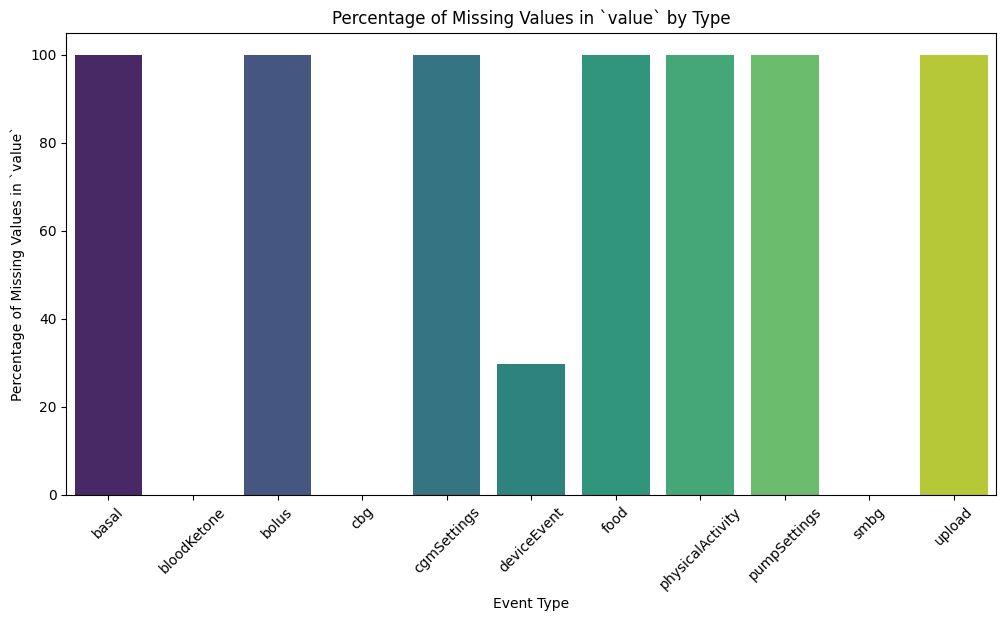

In [11]:
# Display the summary of missing values by type
print("Missing Values Summary by Type:")
display(missing_values_summary)

# Plot missing data percentage for each type
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_summary.index, y=missing_values_summary['Percentage Missing'], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Event Type')
plt.ylabel('Percentage of Missing Values in `value`')
plt.title('Percentage of Missing Values in `value` by Type')
plt.show()

#### Looking at values in the `value` Column by `type`

####  Findings
The analysis of missing values in the `value` column based on the different event `types` shows significant variation in missing data percentages across event types:

- **Types with 100% Missing Values in `value`**:
  - **`basal` (100%)**: All records for basal insulin delivery lack `value`. This could be that `value` for `basal` type is either recorded in another column or was not recorded by patients, in either case we can drop this with respect to value.
  - **`bolus` (100%)**: Similar to `basal`, all `bolus` insulin administration events lack `value`.
  - **`cgmSettings`, `food`, `physicalActivity`, `pumpSettings`, and `upload` (100%)**: All records for these event types have missing `value`. These types may not inherently require a `value` field, so for our usecase this could imply that `value` is not be relevant here.

- **Types with 0% Missing Values in `value`**:
  - **`bloodKetone`, `cbg`, and `smbg` (0%)**: These types have complete data in the `value` field. This alignes with our expectations since they are readings that directly capture numerical values (e.g., glucose levels for `cbg` and `smbg`).

- **Type with Partial Missing Values in `value`**:
  - **`deviceEvent` (29.61%)**: Some records for device events have missing `value`. This could imply incomplete data recording or non-applicable values for certain device events, we can probably drop these as well since they do not directly impact our readings.



###  Plan for Data Cleaning

Based on the analysis of missing values, here's our revised plan for data cleaning:

#### 1. Drop Features with Extremely High Missingness
We will drop the following columns due to their high percentage of missing values (>99%):
- **`activityName`**: Missing in almost all records, with no clear utility.
- **`deviceId`, `deviceManufacturers`, `deviceModel`, `deviceSerialNumber`**: These columns contain information about the device used for data collection. Since they are almost entirely missing, they do not provide value to our analysis.
- **`timeProcessing`**: Largely missing, and likely not informative for our current model development goals.

#### 1.1. Handle Critical Features
- **Impute or Drop Features**:
  - **`deliveryType`, `duration`, and `rate`**: These features have a significant percentage of missing values, and imputing them would require domain-specific knowledge (e.g., time-based interpolation or mode imputation). To avoid introducing uncertainty, we will **drop these columns**.
  
- **Nutrition Features**:
  - **`nutrition.carbohydrate.net` and `nutrition.carbohydrate.units`**: These features are very sparse, so we will **drop them** for now. In the future, we may revisit and add them back if our focus shifts to understanding the impact of nutrition on glucose levels.

#### 2. Handle `value` Column Based on Event Type
Based on our analysis of the `value` column:
- **Drop `value` Where It Is Not Meaningful**:
  - For event types where `value` is completely missing [`basal`, `bolus`, `food`, `upload`, `physicalActivity`, `pumpSettings`, `cgmSettings`], the `value` column **will be dropped** as it does not contribute any useful information.
  
- **Drop `deviceEvent`**:
  - Although `deviceEvent` has some data, the relevance of these events is questionable for our current use case, and keeping this feature could lead to inconsistencies. Therefore, we will choose to also **drop `deviceEvent`**.

- **Retain `value` for Critical Event Types**:
  - For event types such as **`cbg`** (continuous glucose monitoring), **`smbg`** (self-monitoring blood glucose), and **`bloodKetone`**, the `value` column is crucial, as it represents glucose or ketone readings. We will **retain `value`** for these types without any modifications since this will be out target variable our model will train on.



#### Final Set of Features to Retain
After the above cleaning steps, we will retain the following features:
- **`time`**: To track the temporal aspect of each reading.
- **`type`**: To differentiate between different types of readings (`cbg`, `smbg`, `bloodKetone`).
- **`value`**: To store the corresponding reading for the event types of interest.
- **`file_name`**: To identify the patient or file from which the data originated.

Within the **`type`** column, we will only retain events of types:
- **`cbg`**: Continuous glucose readings.
- **`smbg`**: Self-monitored glucose readings.
- **`bloodKetone`**: Blood ketone measurements.


In [12]:
# Step 1: Drop columns with extremely high missingness or those deemed irrelevant for analysis

# Columns to drop based on previous analysis
columns_to_drop = [
    'activityName', 'deliveryType', 'deviceId', 'deviceManufacturers',
    'deviceModel', 'deviceSerialNumber', 'duration', 'est.annotations',
    'est.gapSize', 'est.type', 'nutrition.carbohydrate.net',
    'nutrition.carbohydrate.units', 'rate', 'timeProcessing'
]

# Drop the specified columns
full_data_cleaned = full_data.drop(columns=columns_to_drop)

# Display the updated DataFrame information after dropping irrelevant columns
print("DataFrame Info after Dropping Columns:")
full_data_cleaned.info()


DataFrame Info after Dropping Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12123005 entries, 0 to 12123004
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   type       object 
 2   value      float64
 3   file_name  object 
dtypes: float64(1), object(3)
memory usage: 370.0+ MB


In [13]:
# Save the cleaned dataset
cleaned_data_path = "/content/cleaned_dataset.csv"
full_data_cleaned.to_csv(cleaned_data_path, index=False)

In [14]:
# Filter the DataFrame to keep only the valid event types
valid_types = ['cbg', 'smbg', 'bloodKetone']
full_data_cleaned_by_type = full_data_cleaned[full_data_cleaned['type'].isin(valid_types)]

# Display the filtered DataFrame information
print("DataFrame Info after Filtering for Valid Event Types:")
full_data_cleaned_by_type.info()

DataFrame Info after Filtering for Valid Event Types:
<class 'pandas.core.frame.DataFrame'>
Index: 7190796 entries, 2 to 12123004
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   type       object 
 2   value      float64
 3   file_name  object 
dtypes: float64(1), object(3)
memory usage: 274.3+ MB


In [15]:
# Check for any missing values in the filtered dataset
print("\nMissing Values in Filtered Dataset:")
missing_values = full_data_cleaned_by_type.isnull().sum()
print(missing_values)


Missing Values in Filtered Dataset:
time         0
type         0
value        0
file_name    0
dtype: int64


In [19]:
# We can see that the time is currently saved as an Object so we'll need to assess if there's any cleaning
# required with some cusome reg-ex, then we can move on to updating the column to a standard time format.

# Print a sample of the `time` column to identify any formatting inconsistencies
print("Sample of `time` column:")
print(full_data_cleaned_by_type['time'].sample(10))

# Use a regular expression to identify unique time formats
import re

def identify_time_formats(time_series):
    formats = {}
    for time_str in time_series:
        if pd.isna(time_str):
            continue
        match = re.match(r"^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}(?:\.\d+)?(?:Z|[\+\-]\d{2}:\d{2})?$", time_str)
        if match:
            format_type = 'ISO8601'
        else:
            format_type = 'Other'
        formats[format_type] = formats.get(format_type, 0) + 1

    return formats

# Identify and count unique time formats
time_formats = identify_time_formats(full_data_cleaned_by_type['time'])
print("\nTime Format Distribution:")
for fmt, count in time_formats.items():
    print(f"{fmt}: {count}")

# Check for potential problematic rows where conversion might fail
invalid_time_samples = full_data_cleaned_by_type[~full_data_cleaned_by_type['time'].str.match(r"^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}(?:\.\d+)?(?:Z|[\+\-]\d{2}:\d{2})?$", na=False)].head(10)
print("\nSample of `time` column with potential issues:")
print(invalid_time_samples)


Sample of `time` column:
2994814     2019-08-18T22:12:34.807Z
8424618     2019-07-29T20:10:57.000Z
36740       2019-09-19T06:41:18.000Z
3491491     2018-11-27T07:12:10.000Z
1845701     2019-07-01T08:05:00.000Z
9714565     2019-03-22T01:56:45.500Z
2524667     2019-03-24T16:29:32.000Z
9994607     2019-02-21T19:49:57.000Z
11474690    2019-09-30T01:46:47.737Z
9972737     2019-08-31T23:47:15.000Z
Name: time, dtype: object

Time Format Distribution:
ISO8601: 7190796

Sample of `time` column with potential issues:
Empty DataFrame
Columns: [time, type, value, file_name]
Index: []


In [22]:
# Since we have not seen any major issues we can move in to try and convert the whole column
# Convert the 'time' column to datetime, we'll use .loc[] for safe assignment
full_data_cleaned_by_type.loc[:, 'time'] = pd.to_datetime(full_data_cleaned_by_type['time'], format='ISO8601', errors='coerce')

# Verify if the conversion was successful
print("\nData Types After Converting `time` Column:")
print(full_data_cleaned_by_type.dtypes)

# Display any rows that could not be converted (should be none based on previous analysis)
invalid_times = full_data_cleaned_by_type[full_data_cleaned_by_type['time'].isna()]
print("\nRows with Invalid `time` After Conversion:")
print(invalid_times)



Data Types After Converting `time` Column:
time         datetime64[ns, UTC]
type                      object
value                    float64
file_name                 object
dtype: object

Rows with Invalid `time` After Conversion:
Empty DataFrame
Columns: [time, type, value, file_name]
Index: []


In [23]:
# Save the cleaned dataset for further analysis
cleaned_data_path = "/content/cleaned_glucose_tidepool_dataset.csv"
full_data_cleaned_by_type.to_csv(cleaned_data_path, index=False)

print("Cleaned dataset saved to:", cleaned_data_path)


Cleaned dataset saved to: /content/cleaned_glucose_tidepool_dataset.csv


Now that we have a data set we can work with we can explore the characteristics of glucose measurements (cbg, smbg) and ketone levels (bloodKetone) we have in this data set.

We'll take a look at the following;


1. ***Distribution of Glucose Values***: Understand the overall distribution of glucose values across different patients.
2. **Time-Based Trends**: Analyze the temporal aspects of glucose readings, such as daily or weekly trends.
3. **Distribution of Glucose Readings by Type**: Compare distributions between cbg and smbg event types.
4. **Identify Outliers**: Determine the presence of extreme glucose values which could be indicative of hyper- or hypoglycemia

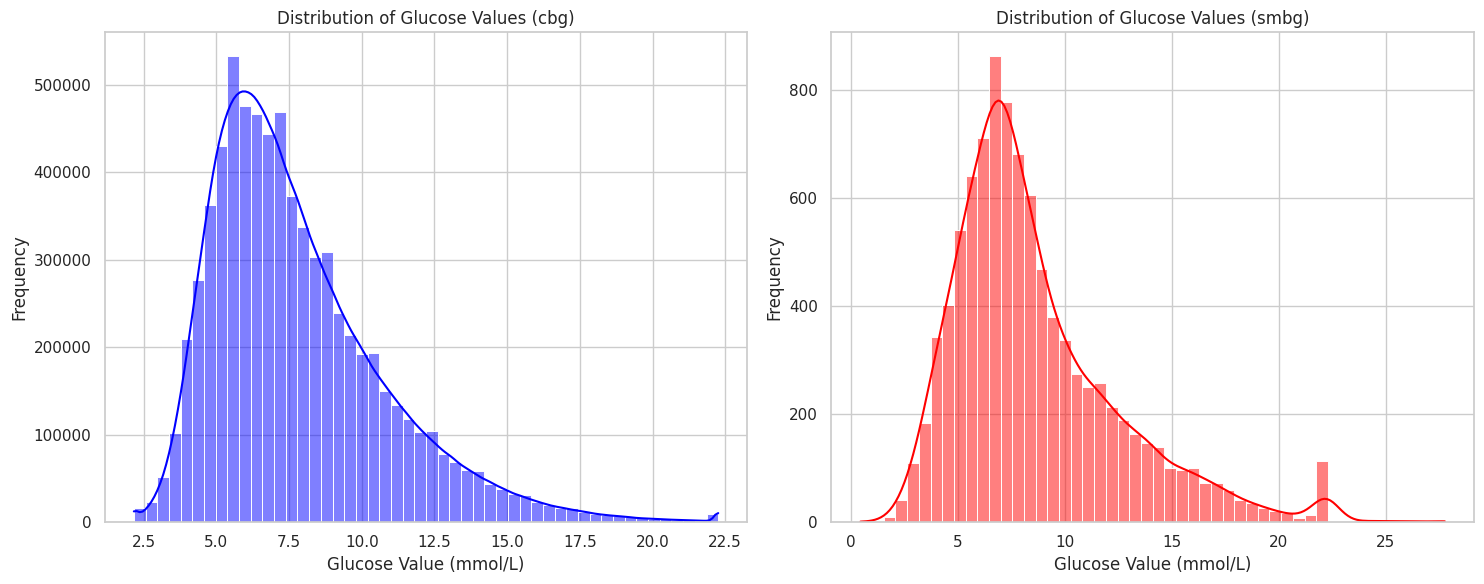

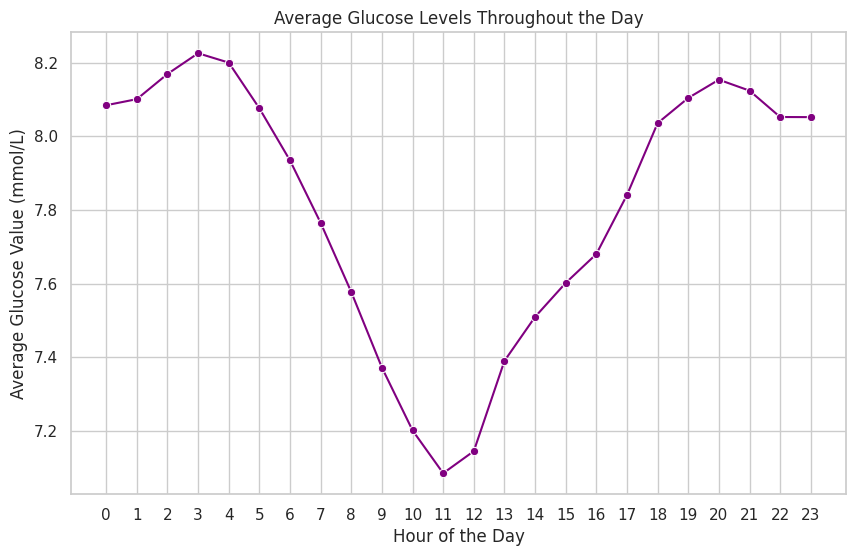

<ipython-input-36-fae8f9eeeb30>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data_cleaned_by_type, x='type', y='value', palette='Set2')


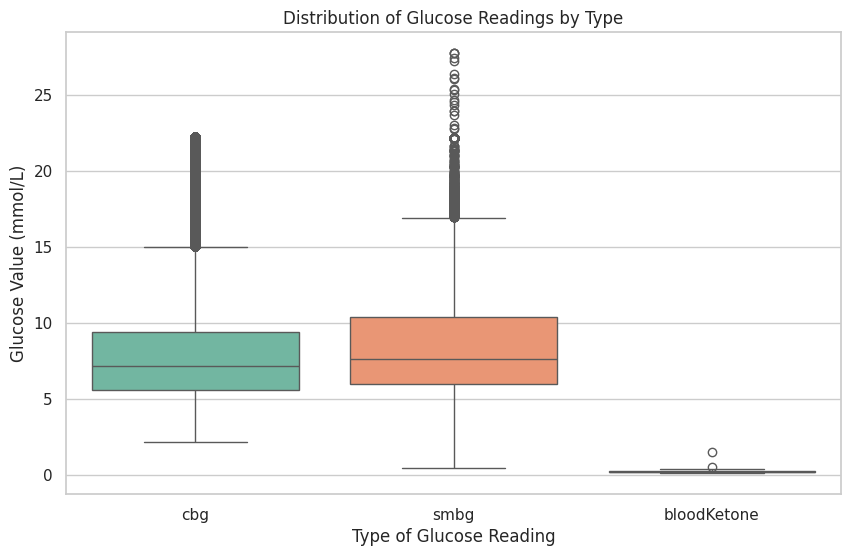

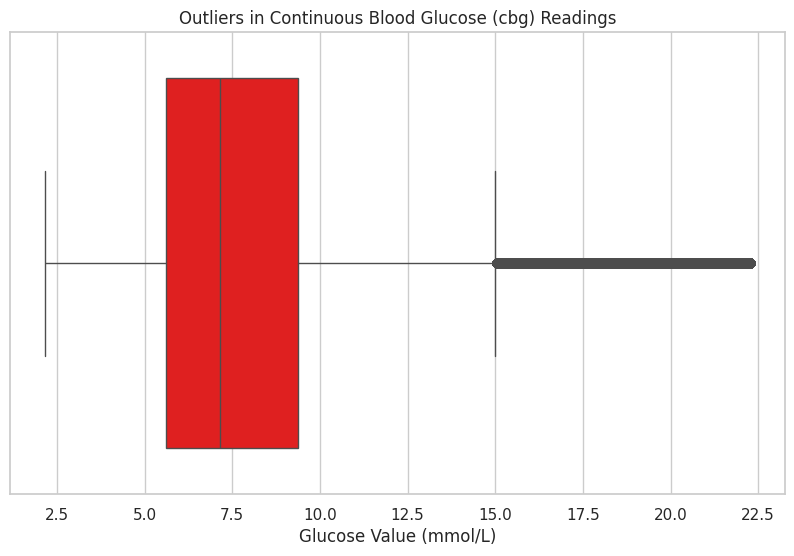

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style for the plots
sns.set(style="whitegrid")

# 1. Distribution of Glucose Values
# Set up subplots to display cbg and smbg separately with different y-axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
# Plot cbg values on the first subplot
sns.histplot(full_data_cleaned_by_type[full_data_cleaned_by_type['type'] == 'cbg']['value'],
             kde=True, bins=50, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Glucose Values (cbg)')
axes[0].set_xlabel('Glucose Value (mmol/L)')
axes[0].set_ylabel('Frequency')
# Plot smbg values on the second subplot
sns.histplot(full_data_cleaned_by_type[full_data_cleaned_by_type['type'] == 'smbg']['value'],
             kde=True, bins=50, color='red', ax=axes[1])
axes[1].set_title('Distribution of Glucose Values (smbg)')
axes[1].set_xlabel('Glucose Value (mmol/L)')
axes[1].set_ylabel('Frequency')
# Adjust our layout to ensure subplots are clear
plt.tight_layout()
plt.show()


# 2. Time-Based Trends: Example of Daily Trends
# (We'll use .loc[] again for safe assinment)
full_data_cleaned_by_type.loc[:, 'date'] = full_data_cleaned_by_type['time'].dt.date
full_data_cleaned_by_type.loc[:, 'hour'] = full_data_cleaned_by_type['time'].dt.hour

# Group by hour to calculate mean glucose value
hourly_trends = full_data_cleaned_by_type.groupby('hour')['value'].mean().reset_index()

# Plot the hourly trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trends, x='hour', y='value', marker='o', color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Glucose Value (mmol/L)')
plt.title('Average Glucose Levels Throughout the Day')
plt.xticks(range(0, 24))
plt.show()

# 3. Distribution of Glucose Readings by Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_data_cleaned_by_type, x='type', y='value', palette='Set2')
plt.xlabel('Type of Glucose Reading')
plt.ylabel('Glucose Value (mmol/L)')
plt.title('Distribution of Glucose Readings by Type')
plt.show()

# 4. Identify Outliers in Glucose Values (possible hyper- or hypoglycemia)
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_data_cleaned_by_type[full_data_cleaned_by_type['type'] == 'cbg'], x='value', color='red')
plt.xlabel('Glucose Value (mmol/L)')
plt.title('Outliers in Continuous Blood Glucose (cbg) Readings')
plt.show()

# Note: The above plot focuses on identifying extreme glucose values which is one of our
# main goals to identify hyper- or hypoglycemia levels.


#### Looking at our findings;

**Distribution of Glucose Values**(cbg and smbg)
 show a significant disparity in the number of readings between cbg and smbg.

1. **cbg**: We can see a high density of readings centered around 6-8 mmol/L. There is a long tail, which suggests that there are fewer high glucose readings above 10 mmol/L. This would seem consistent with expected glucose trends where most readings would be concentrated in the normal range, with fewer instances of hyperglycemia.
2. **smbg**: There are far fewer data points compared to cbg. This disparity makes it challenging to visually compare the distributions on the same scale. So above we created a separate y-axes for each type, this could represent the distributions without misleading differences in frequencies.

**Average Glucose Levels Throughout the Day**

The line plot of average glucose values across different hours of the day shows a clear trend:

1. The average glucose levels tend to be highest in the early morning (0-4 am) and evening (6-10 pm).
2. There is a notable dip around late morning to early afternoon (10 am - 2 pm), indicating that average glucose levels tend to be lower during this time.
This pattern could be influenced by the daily routines of individuals, such as meal times, physical activity, or insulin dosing schedules. It is important to consider these insights when designing predictive models or recommending intervention timings.

**Distribution of Glucose Readings by Type**

The boxplot for glucose readings of different types (cbg, smbg, bloodKetone) reveals:

1. **cbg and smbg**: Both readings have a similar median value. However, smbg appears to have more outliers, which may indicate more extreme values recorded during manual checks compared to continuous monitoring.
2. **bloodKetone**: The distribution is significantly different and lower. This makes sense though since we assume the ketone levels are typically measured during certain specific situations and are not directly indicative of glucose levels.

**Outliers in Continuous Blood Glucose (cbg) Readings**

The boxplot for cbg readings shows a median glucose value around *7.5 mmol/L*, with numerous outliers on the higher end. These outliers could be potential indicators of hyperglycemic events.

Identifying these outliers will be importatnt for our goal to predict hyperglycemic or hypoglycemic events, as these extreme glucose levels could pose significant health risks for people with diabetes. We might consider focusing on this range to understand what leads to these elevated glucose values.

### Augment data
We can use this data set for our Innital run of model evaluation But based on the Metadata we have, we can addtionaly augment this data with a few more feature to see if our model can be benfit from them. Specifical `age` and `Sex` data.

Since we can derive the age [ageStart] and sex [biologicalSex] directly from the metadata and add them as additional columns in our full_data_cleaned_by_type dataset, we will  iterat through the rows and add the relevant values accordingly.

In [37]:
# 1-  Create Dictionaries for Metadata Lookup:
# We will create dictionaries for ageStart and biologicalSex using the
# metadata_summary_df by file_name.

age_dict = metadata_summary_df.set_index('file_name')['ageStart'].to_dict()
sex_dict = metadata_summary_df.set_index('file_name')['biologicalSex'].to_dict()


In [38]:
# 2- Using the dictionaries we created, we  fill two new columns for age and sex,
#    in the full_data_cleaned_by_type

# Add new columns 'ageStart' and 'biologicalSex' to the DataFrame by mapping file_name to the dictionaries
full_data_cleaned_by_type['ageStart'] = full_data_cleaned_by_type['file_name'].map(age_dict)
full_data_cleaned_by_type['biologicalSex'] = full_data_cleaned_by_type['file_name'].map(sex_dict)

# Drop rows with missing 'biologicalSex' information as discussed (As discussed above these will be 37 out of 150 patients)
full_data_cleaned_by_type = full_data_cleaned_by_type.dropna(subset=['biologicalSex'])

# Convert the 'biologicalSex' column to numerical format for modeling ('female' = 0, 'male' = 1)
full_data_cleaned_by_type['biologicalSex'] = full_data_cleaned_by_type['biologicalSex'].map({'male': 1, 'female': 0})

# Display the updated dataset to verify the addition of 'ageStart' and 'biologicalSex' columns
print("Data Info After Adding ageStart and biologicalSex Columns:")
full_data_cleaned_by_type.info()

# Display a sample of the updated dataset
display(full_data_cleaned_by_type.head())


<ipython-input-38-a27a0c23458d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_cleaned_by_type['ageStart'] = full_data_cleaned_by_type['file_name'].map(age_dict)
<ipython-input-38-a27a0c23458d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_cleaned_by_type['biologicalSex'] = full_data_cleaned_by_type['file_name'].map(sex_dict)


Data Info After Adding ageStart and biologicalSex Columns:
<class 'pandas.core.frame.DataFrame'>
Index: 5501340 entries, 48175 to 12123004
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   time           datetime64[ns, UTC]
 1   type           object             
 2   value          float64            
 3   file_name      object             
 4   date           object             
 5   hour           int32              
 6   ageStart       int64              
 7   biologicalSex  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int32(1), int64(1), object(3)
memory usage: 356.8+ MB


,time,type,value,file_name,date,hour,ageStart,biologicalSex
48175,2019-06-23 00:04:58+00:00,cbg,8.60366,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...,2019-06-23,0,64,1.0
48176,2019-06-23 00:09:59+00:00,cbg,8.38163,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...,2019-06-23,0,64,1.0
48177,2019-06-23 00:14:59+00:00,cbg,8.10409,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...,2019-06-23,0,64,1.0
48178,2019-06-23 00:19:59+00:00,cbg,7.82655,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...,2019-06-23,0,64,1.0
48179,2019-06-23 00:24:59+00:00,cbg,7.60452,train_39b32481640dc42af3ecdb07f8a3e5864d2e6d3e...,2019-06-23,0,64,1.0


In [40]:
# Save the cleaned dataset for further analysis
cleaned_augmented_data_path = "/content/cleaned_glucose_tidepool_dataset_augmented.csv"
full_data_cleaned_by_type.to_csv(cleaned_augmented_data_path, index=False)

print("Cleaned dataset saved to:", cleaned_augmented_data_path)

Cleaned dataset saved to: /content/cleaned_glucose_tidepool_dataset_augmented.csv


### Looking at augment data
Now that we've added additional features from the metadata: `ageStart` and `biologicalSex`, lets take a quick analysis to understand how glucose levels differ across age groups and between sexes.



1. **Distribution of Glucose Levels Across Age Groups**:
   - We will categorize patients into different age groups: Children (0-17), Young Adults (18-35), Middle-Aged Adults (36-55), and Seniors (56+).
   - Plot the glucose levels for each age group to identify any patterns or differences.

2. **Comparison of Glucose Levels Between Males and Females**:
   - Compare the distribution of glucose values between male and female patients.
   - Identify if there are any notable differences in glucose regulation between genders.

<ipython-input-39-476ecef1946e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data_cleaned_by_type, x='age_group', y='value', palette='Set3')


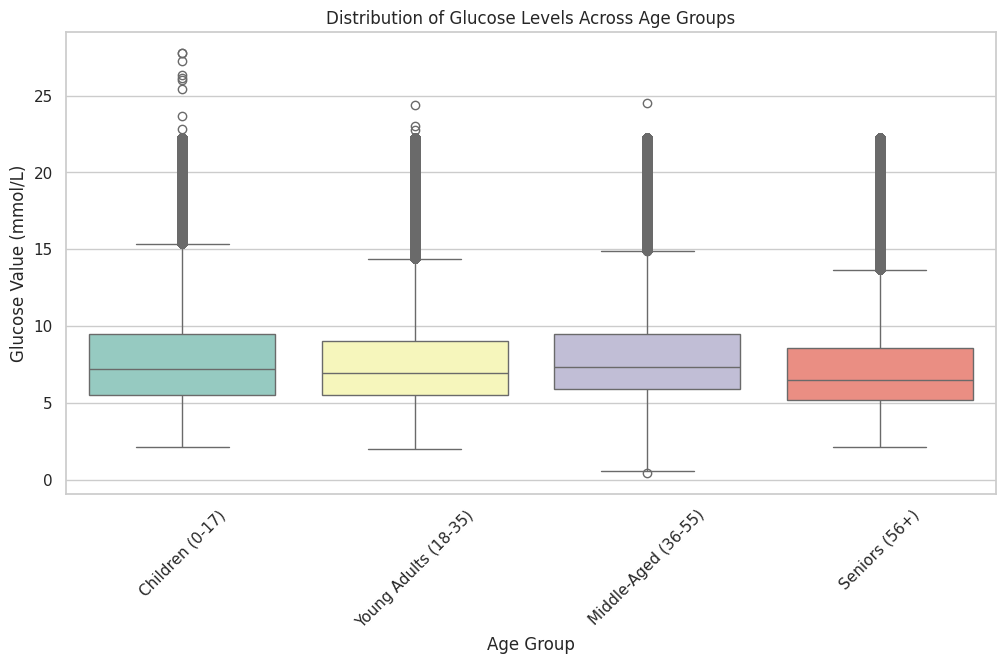

<ipython-input-39-476ecef1946e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data_cleaned_by_type, x='biologicalSex', y='value', palette='Set2')


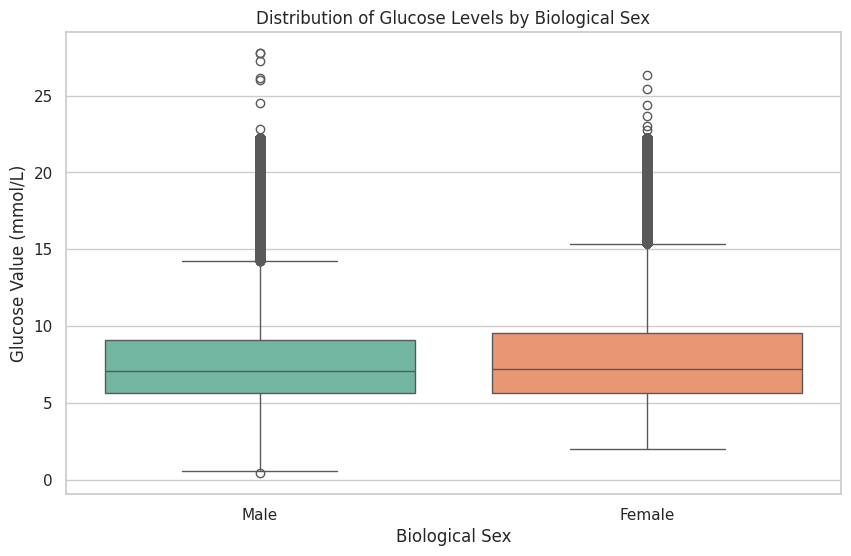

In [39]:
# 1. Distribution of Glucose Levels Across Age Groups
# Define age groups
bins = [0, 17, 35, 55, 100]
labels = ['Children (0-17)', 'Young Adults (18-35)', 'Middle-Aged (36-55)', 'Seniors (56+)']
full_data_cleaned_by_type['age_group'] = pd.cut(full_data_cleaned_by_type['ageStart'], bins=bins, labels=labels)

# Plot the distribution of glucose levels across age groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_data_cleaned_by_type, x='age_group', y='value', palette='Set3')
plt.xlabel('Age Group')
plt.ylabel('Glucose Value (mmol/L)')
plt.title('Distribution of Glucose Levels Across Age Groups')
plt.xticks(rotation=45)
plt.show()

# 2. Comparison of Glucose Levels Between Males and Females
# Replace biologicalSex with more interpretable values
full_data_cleaned_by_type['biologicalSex'] = full_data_cleaned_by_type['biologicalSex'].replace({1.0: 'Male', 0.0: 'Female'})

# Plot the distribution of glucose levels by biological sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_data_cleaned_by_type, x='biologicalSex', y='value', palette='Set2')
plt.xlabel('Biological Sex')
plt.ylabel('Glucose Value (mmol/L)')
plt.title('Distribution of Glucose Levels by Biological Sex')
plt.show()

### Taking a look at the results;

**Glucose Levels Across Age Groups:**
The boxplot comparing glucose levels across age groups (Children, Young Adults, Middle-Aged, Seniors) reveals that:

- **Children and Young Adults** have relatively similar median glucose levels, indicating similar glucose regulation among these younger groups.
Middle-Aged individuals tend to have slightly higher median glucose values compared to younger groups.
- **Seniors show slightly lower median glucose levels**, but the range of glucose readings (including outliers) remains broad.

All groups show the presence of high glucose outliers, indicating that hyperglycemia is common across different age groups.

**Glucose Levels by Biological Sex:**

The comparison of glucose levels between Male and Female participants shows:
- Both males and females exhibit similar distributions of glucose values, but females seem to have a slightly higher median glucose level.

- There are numerous high glucose outliers for both sexes, suggesting that hyperglycemia is prevalent in both groups.

- One thing to note is that there seems to be a slightly higher median for females and this could warrant further investigation to understand potential biological or behavioral factors contributing to this difference. (outside the scope of this paper)

## Summary of Exploratory Data Analysis
In this notebook, we have conducted a thorough EDA to understand the structure, completeness, and relationships within our dataset.

Key insights include:

- The distribution of glucose values indicates a common pattern of glucose regulation across individuals, but with notable occurrences of hyperglycemic outliers.

- Time-based trends reveal significant daily fluctuations in glucose levels, with lower values typically observed during midday and higher values at night and early morning.

- Glucose levels by age group show similar trends, though older age groups exhibit some differences in median glucose levels.
Glucose levels by biological sex indicate slightly higher median glucose values among females, but the overall distribution is similar between sexes.




###
Recommendations for Feature Engineering
Based on our findings, the following are recommendations for our next notebook on feature engineering:

Time-Based Features:

- Incorporate features such as time of day (morning, afternoon, evening, night), and day of the week to better capture temporal trends in glucose levels.
Create features for daily glucose variability, such as mean glucose per day and standard deviation of glucose readings.
Demographic Features:

- We could run two models one with with and without the augment data. If we retain ageStart and biologicalSex as features in the model,we could explore the  observed variations in glucose levels by age and sex, suggesting their potential influence on glucose regulation.
If we do we could consider interacting features such as age group with biological sex to see if it captures additional variability.

- Exploring glucose dynamics features by construct features that capture the rate of glucose change over time, which may help in predicting sudden glucose swings (i.e  a rolling average of glucose change).
- Create a hyper/hypoglycemia flag based on specific thresholds to explicitly mark critical glucose levels[We will base this of off past reseach on base levels].

To start with might expore a simple  simple linear regression model to evaluate how well the features predict glucose levels as a base line.

Then move on to our advanced  LSTM/GRU to leverage the sequential nature of the data.
